In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import fanc
import fanc.plotting as fancplot

In [3]:
hic = fanc.load("./Dataset/GSM1551688_HIC143.hic", resolution=50_000)

In [4]:
data = hic.matrix(('6:2mb-3mb', '6:500kb-1mb'), mask=False)
print(data.shape)
data

/home/patryk/.local/lib/python3.10/site-packages/fanc/compatibility/juicer.py:793: UserWarning: Cannot find normalisation vector for chromosome: Y, normalisation: KR, resolution: 50000, unit: BP. This could indicate that KR normalisation did not work for this chromosome. Will return NaN instead.
  warnings.warn("Cannot find normalisation vector for "


(21, 11)


masked_array(
  data=[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 1.42292894,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 1.3283172 , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.96714846, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.92255205,
         0.        ],
        [0.77311211, 0.        , 0.        , 0.        , 0.        ,
         0.90994202, 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.   

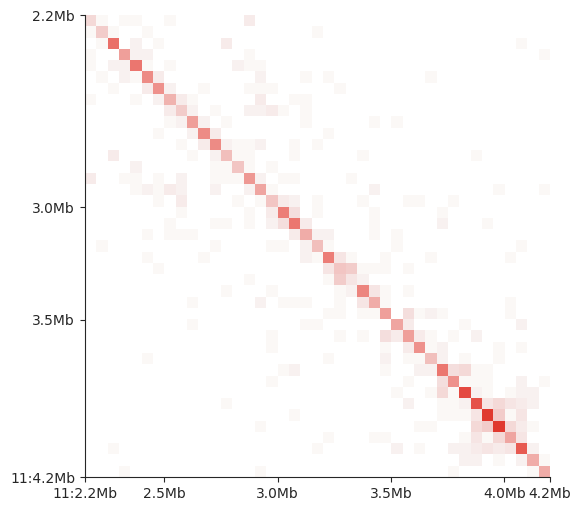

In [5]:
plt.figure(figsize=(6, 6))
hp = fancplot.SquareMatrixPlot(hic, colormap='white_red', matrix_norm=False, show_colorbar=False) 
hp.plot('11:2.2mb-4.2mb')
hp.show()